<div align="center">
    <h1>US Violent Crime Data Analysis</h1>
    <h2>Data Analysis on Violent Crime in the United States of America 1960-2019</h2>
</div>

<img src="car_police_light.png" alt="Police Car Lights">

In [16]:
# Import dependencies
from dotenv import load_dotenv
from sqlalchemy import create_engine, text
from sqlalchemy.exc import SQLAlchemyError
import pandas as pd
import plotly.express as px
import os
import db_helpers

In [17]:
# Load environment variables
load_dotenv()

True

In [18]:
# Read environment variables
DB_TYPE = os.getenv("DB_TYPE")
DB_DRIVER = os.getenv("DB_DRIVER")
DB_NAME = os.getenv("DB_NAME")
DB_HOST = os.getenv("DB_HOST")
DB_USER = os.getenv("DB_USER")
DB_PASS = os.getenv("DB_PASS")
DB_TABLE = os.getenv("DB_TABLE")

In [19]:
# Try to create a connection to the MySQL database
try:
    engine = create_engine(f"{DB_TYPE}+{DB_DRIVER}://{DB_USER}:{DB_PASS}@{DB_HOST}/{DB_NAME}")

except Exception as e:
    print("Count not connect to database ")
    print(e)

In [20]:
# Build SQL Query to grab all data from the DB
sql_query = text(f"SELECT * FROM {DB_TABLE}")

In [21]:
# Try to Execute the SQL Query to grab all data regarding US Violent Crime from the Database
try:
    with engine.connect() as connection:
        result = connection.execute(sql_query)
        data = result.fetchall()

except SQLAlchemyError as e:
    print("Could not extract data from the database")
    print(e)

else:
    crime_df = pd.DataFrame(data, columns = result.keys())

finally:
    engine.dispose()

In [22]:
# Drop NaN values if there are any
crime_df.dropna(inplace = True)

In [23]:
# Drop all columns that have Total or Population or All in their names since we won't use them
columns_with_total = [col for col in crime_df.columns if "Totals" in col or "Population" in col or "All" in col]
crime_df.drop(columns = columns_with_total, inplace = True)

In [24]:
# Rename the columns so it is easier to refer to them
column_map = {
    "Data.Rates.Property.Burglary" : "Burglary",
    "Data.Rates.Property.Larceny": "Larceny",
    "Data.Rates.Property.Motor": "Motor",
    "Data.Rates.Violent.Assault": "Assault",
    "Data.Rates.Violent.Murder": "Murder",
    "Data.Rates.Violent.Rape": "Rape",
    "Data.Rates.Violent.Robbery": "Robbery"
}

crime_df.rename(columns = column_map, inplace = True)

In [25]:
# Calculate the total crime rate of each state by adding up all other crime rates
crime_df["Total Crime"] = crime_df["Burglary"] + crime_df["Larceny"] + crime_df["Motor"] + crime_df["Assault"] \
+ crime_df["Murder"] + crime_df["Rape"] + crime_df["Robbery"]

In [26]:
# Group the states in geographical regions to make analysis easier
midwest_states = ["Illinois", 
                  "Indiana", "Iowa", 
                  "Kansas", 
                  "Michigan", 
                  "Minnesota", 
                  "Missouri", 
                  "Nebraska", 
                  "North Dakota", 
                  "Ohio", 
                  "South Dakota",
                  "Wisconsin"]

northeast_states = ["Connecticut", 
                    "Maine",
                    "Massachusetts",
                    "New Hampshire",
                    "New Jersey",
                    "New York",
                    "Pennsylvania",
                    "Rhode Island",
                    "Vermont"]

south_states = ["Alabama", 
                "Arkansas",
                "Delaware",
                "District of Columbia",
                "Florida",
                "Georgia",
                "Kentucky",
                "Louisiana",
                "Maryland",
                "Mississippi",
                "North Carolina",
                "Oklahoma",
                "South Carolina",
                "Tennessee",
                "Texas",
                "Virginia",
                "West Virginia"]

west_states = ["Alaska",
               "Arizona",
               "California",
               "Colorado",
               "Hawaii",
               "Idaho",
               "Montana",
               "Nevada",
               "New Mexico",
               "Oregon",
               "Utah",
               "Washington",
               "Wyoming"]

# Map states to their regions
regions_states_map = {
    "Midwest": midwest_states,
    "Northeast": northeast_states,
    "South": south_states,
    "West": west_states
}

# Make a funciton to map states to regions
def map_region_to_state(state):
    for region, state_list in regions_states_map.items():
        if state in state_list:
            return region

    return "Other"

# Apply the function to the Pandas DataFrame
crime_df["Region"] = crime_df["State"].apply(map_region_to_state)

In [27]:
# Make interactive bar charts for each type of crime
def make_region_crime_barchart(crime_type, title, range, width, height):
    
    fig = px.bar(crime_df, x = "Region", y = crime_type, 
           color = "Region", animation_frame = "Year", 
           animation_group = "State", 
           hover_name = "State",
           range_y = range,
           width = width,
           height = height,
           title = title)
    fig.show()

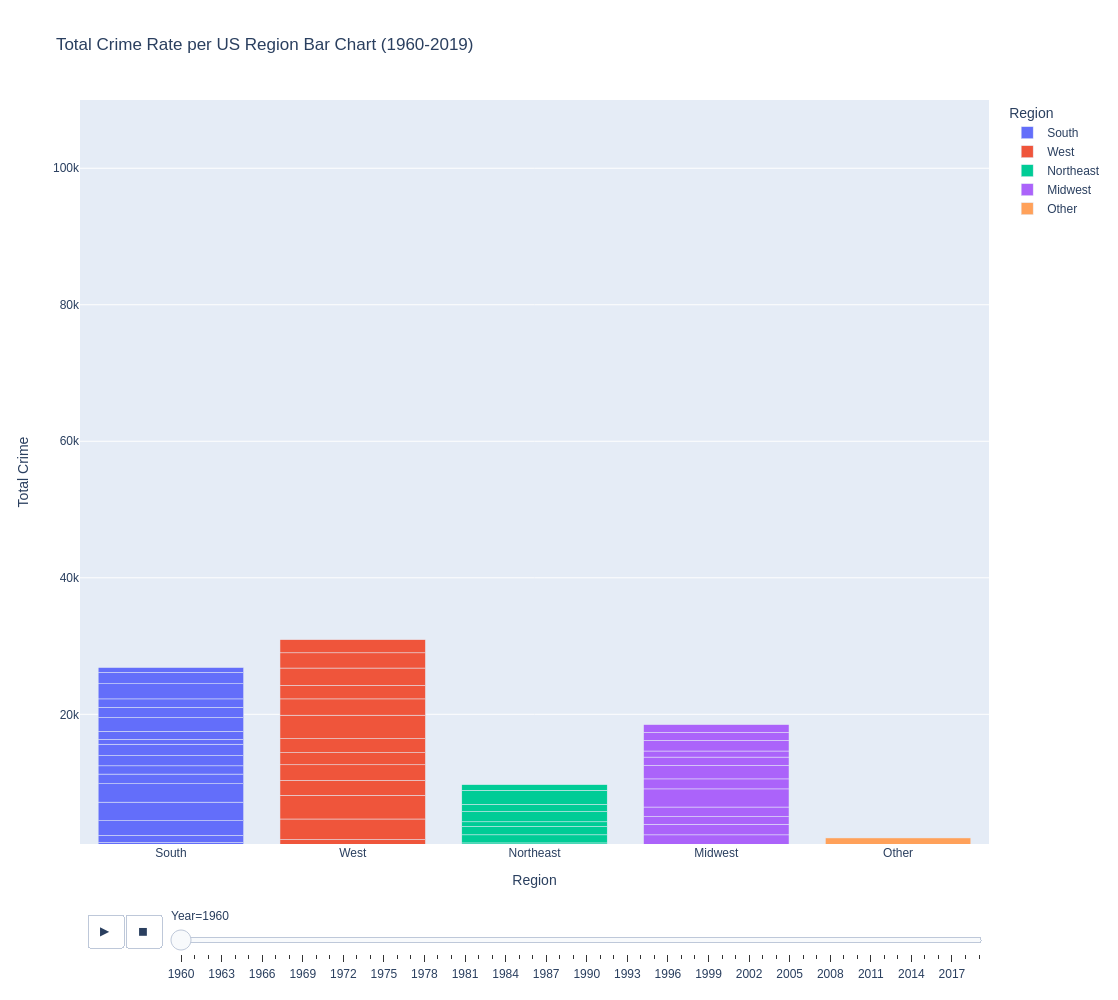

In [28]:
# Make an interactive bar chart for the "Total Crime" on each region
make_region_crime_barchart("Total Crime", "Total Crime Rate per US Region Bar Chart (1960-2019)", [1000, 110000],1000, 1000)

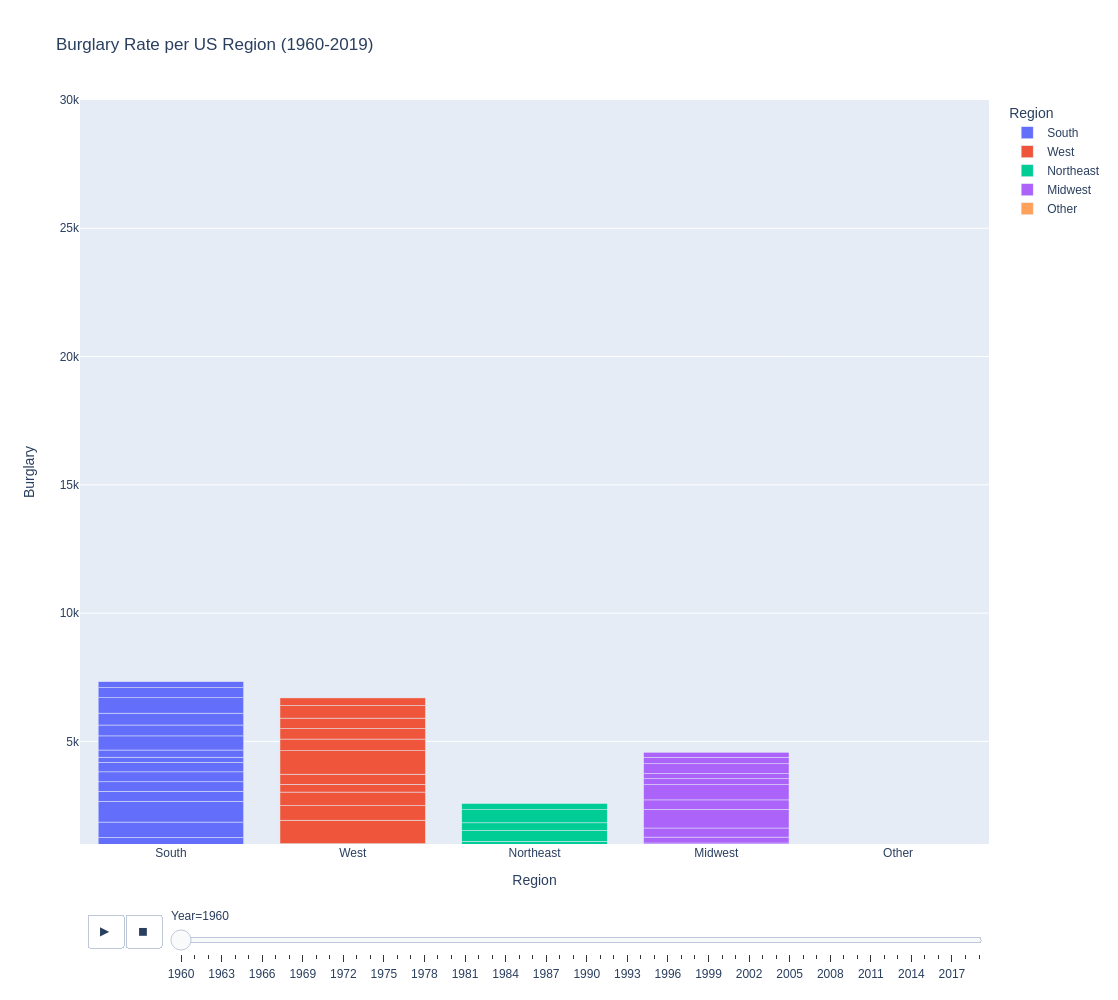

In [29]:
# Make an interactive bar chart for "Burglary" on each region
make_region_crime_barchart("Burglary", "Burglary Rate per US Region (1960-2019)",[1000, 30000],1000, 1000)

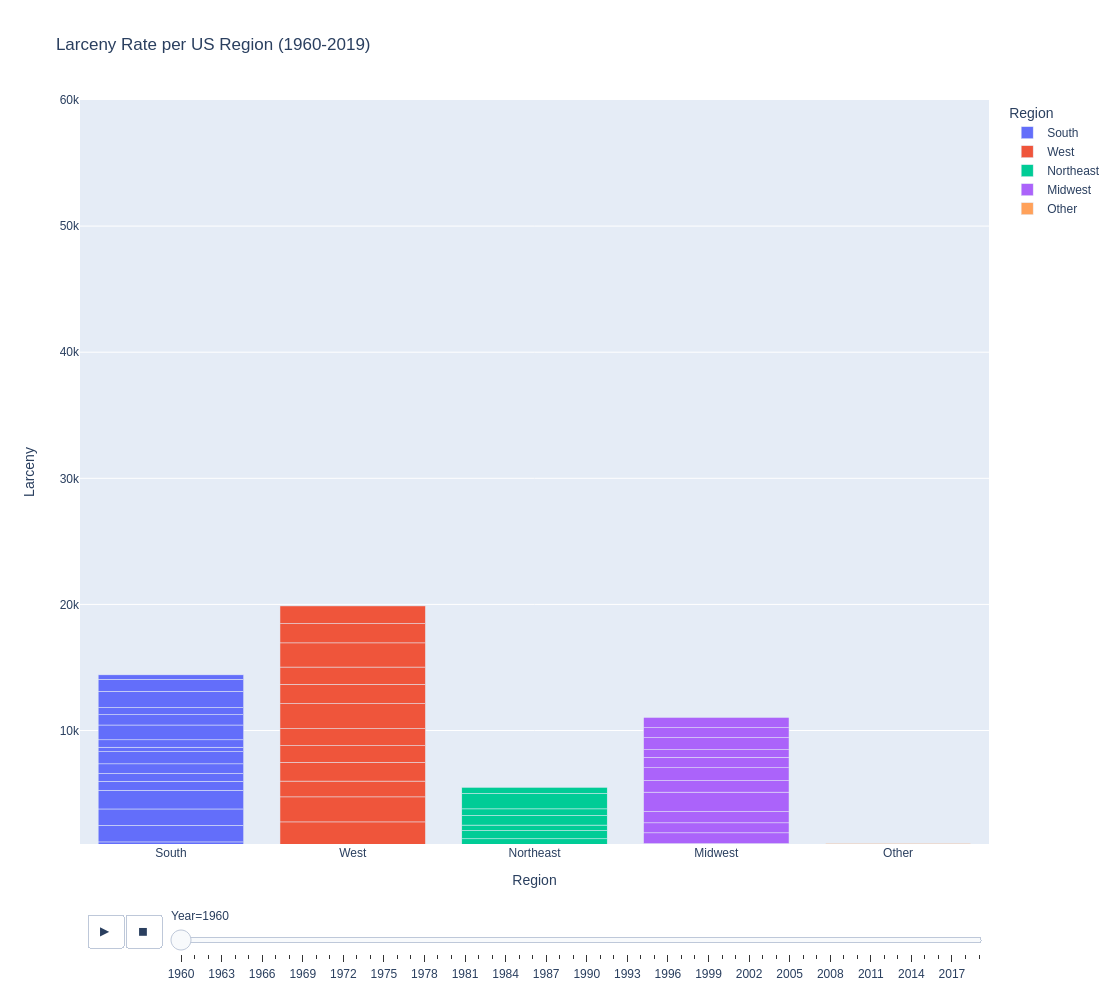

In [30]:
# Make an interactive bar chart for "Larceny" on each region
make_region_crime_barchart("Larceny", "Larceny Rate per US Region (1960-2019)", [1000, 60000],1000, 1000)

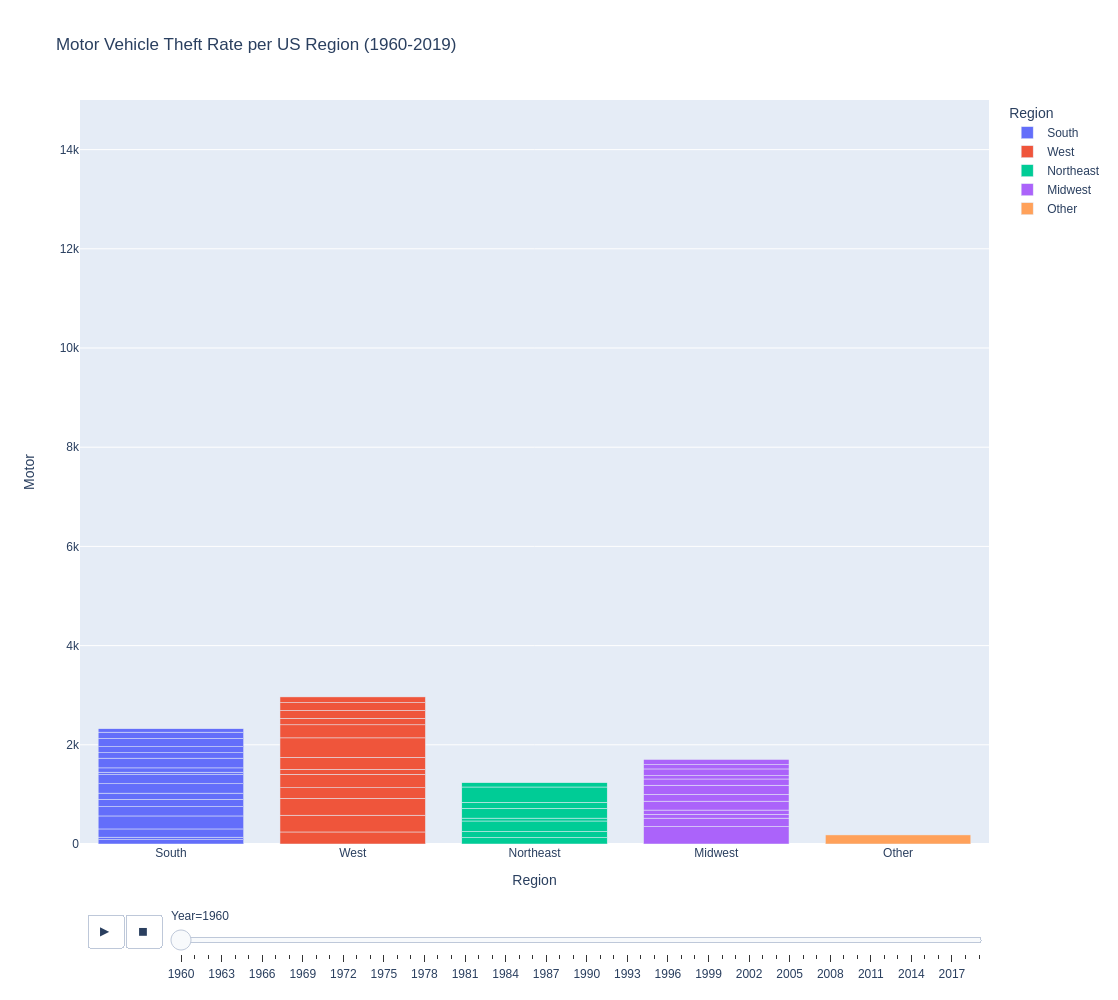

In [31]:
# Make an interactive bar chart for "Motor" on each region
make_region_crime_barchart("Motor", "Motor Vehicle Theft Rate per US Region (1960-2019)", [0, 15000],1000, 1000)

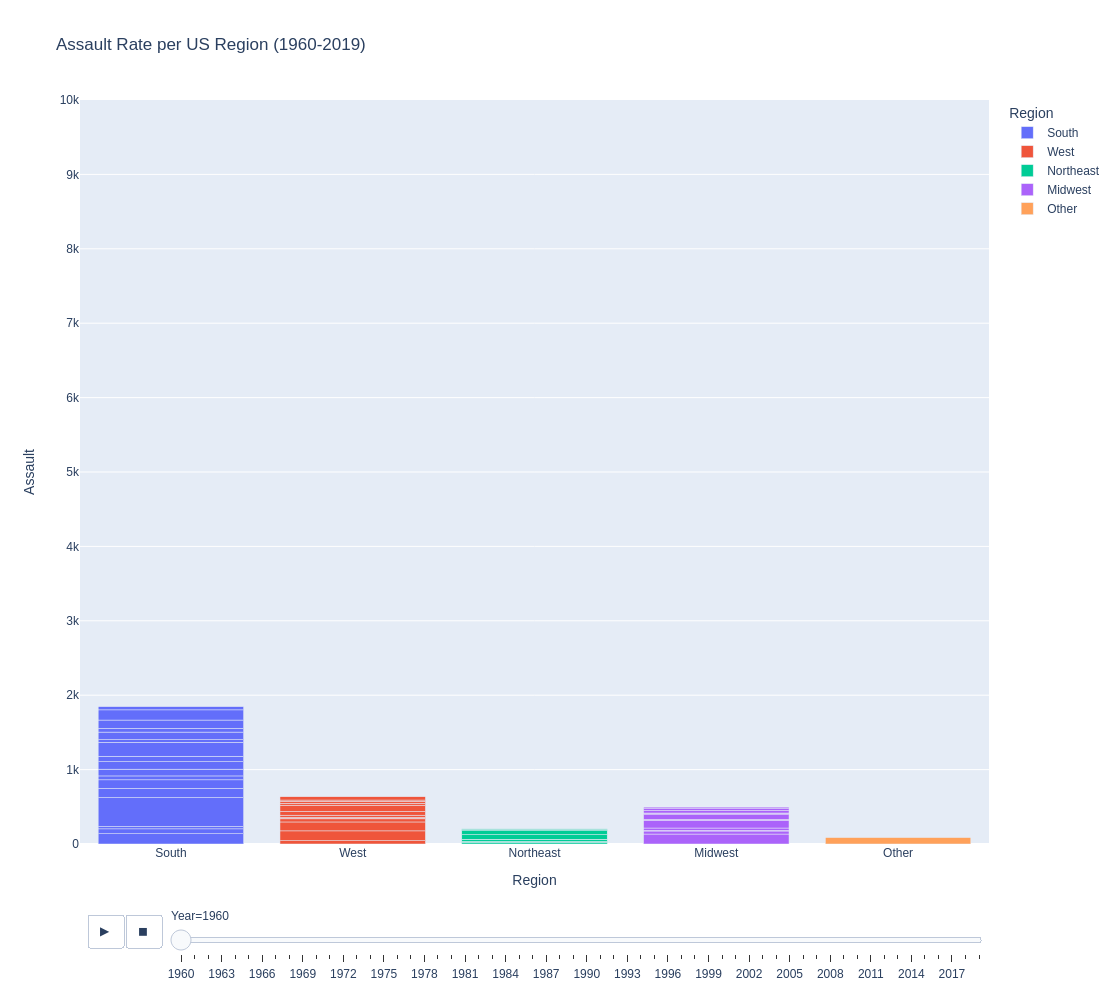

In [32]:
# Make an interactive bar chart for "Assault" on each region
make_region_crime_barchart("Assault", "Assault Rate per US Region (1960-2019)", [0, 10000],1000, 1000)

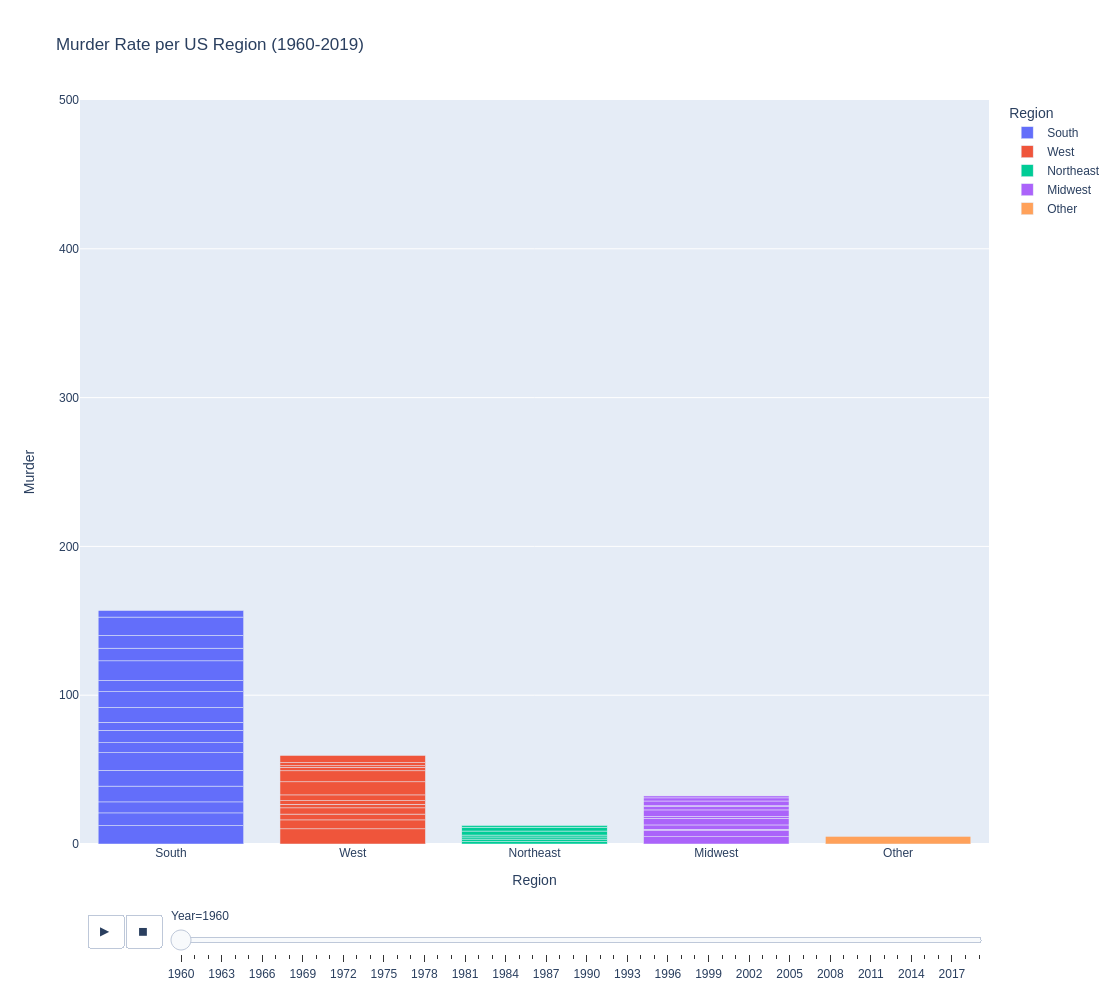

In [33]:
# Make an interactive bar chart for "Murder" on each region
make_region_crime_barchart("Murder", "Murder Rate per US Region (1960-2019)", [0, 500],1000, 1000)

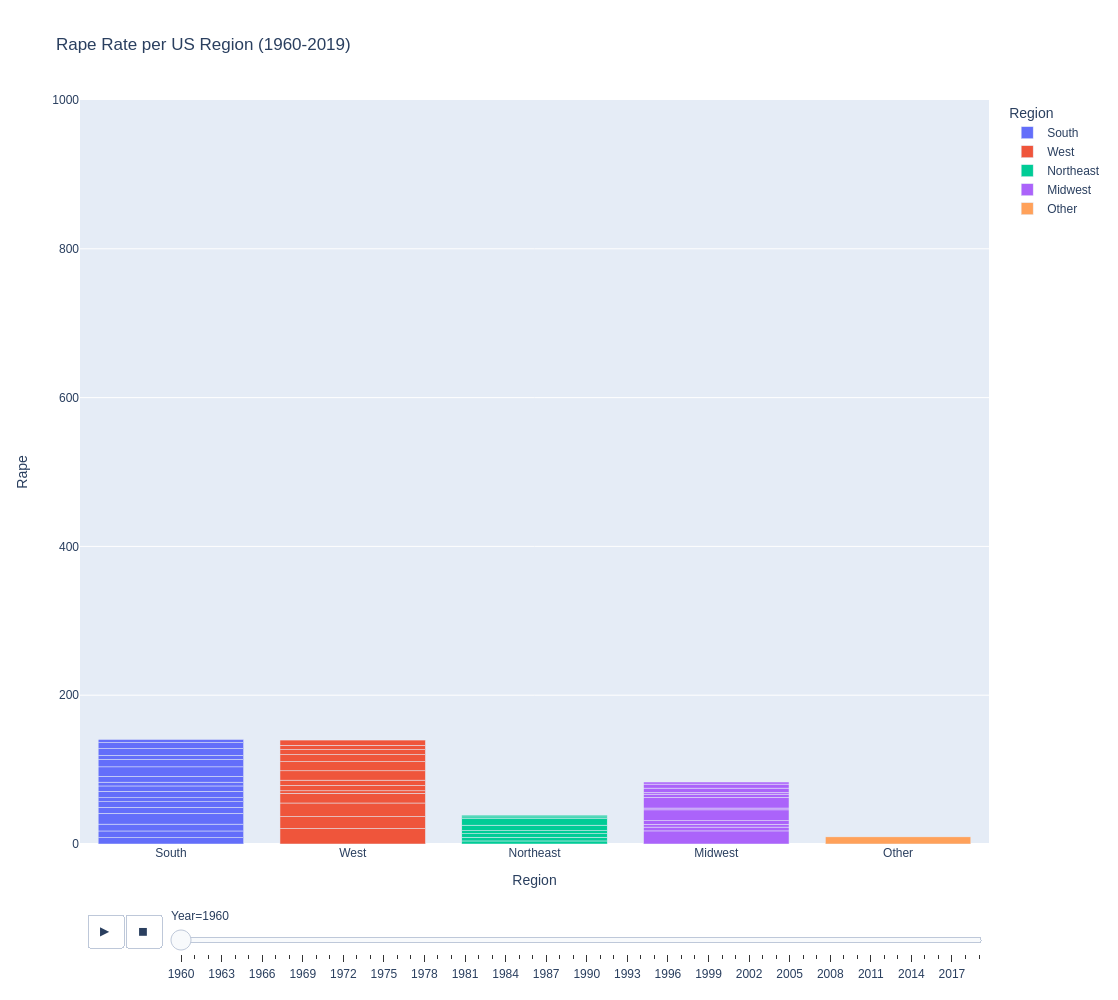

In [34]:
# Make an interactive bar chart for "Rape" on each region
make_region_crime_barchart("Rape", "Rape Rate per US Region (1960-2019)", [0, 1000],1000, 1000)

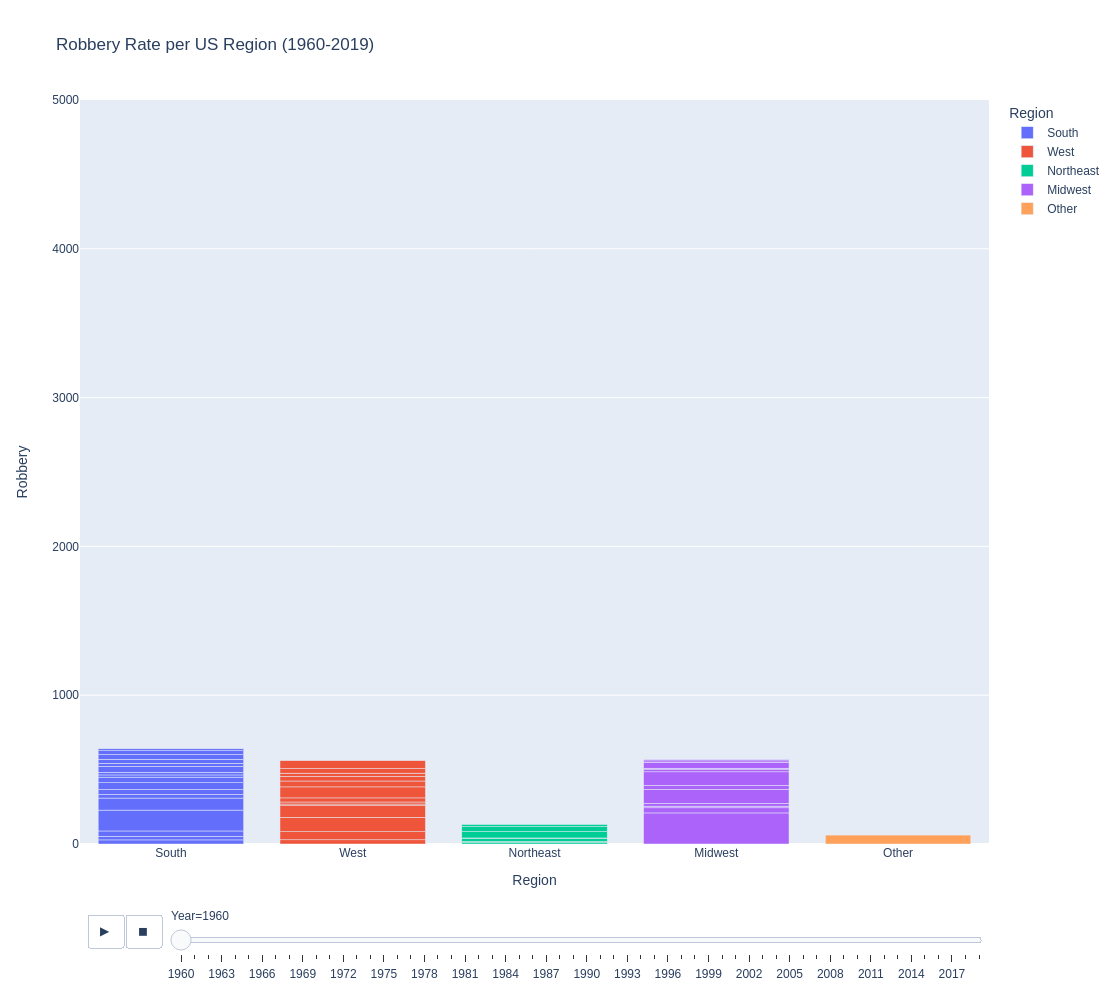

In [35]:
# Make an interactive bar chart for "Robbery" on each region
make_region_crime_barchart("Robbery", "Robbery Rate per US Region (1960-2019)", [0, 5000],1000, 1000)